In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam

In [3]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    
    # convert shape of x_train from (60000, 28, 28) to (60000, 784) 
    # 784 columns per row
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)
(X_train, y_train,X_test, y_test)=load_data()
print(X_train.shape)

(60000, 784)


In [4]:
def adam_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)

In [5]:
def create_generator():
    generator=Sequential()
    generator.add(Dense(units=256,input_dim=100))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=784, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return generator
g=create_generator()
g.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)              

In [6]:
def create_discriminator():
    discriminator=Sequential()
    discriminator.add(Dense(units=1024,input_dim=784))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    
    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(units=1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return discriminator
d =create_discriminator()
d.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)              

In [7]:
def create_gan(discriminator, generator):
    discriminator.trainable=False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan= Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan
gan = create_gan(d,g)
gan.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


In [8]:
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image %d.png' %epoch)

Epoch 1


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.90it/s]


Epoch 2


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.69it/s]


Epoch 3


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.68it/s]


Epoch 4


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.63it/s]


Epoch 5


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.64it/s]


Epoch 6


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.79it/s]


Epoch 7


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.74it/s]


Epoch 8


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.79it/s]


Epoch 9


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.72it/s]


Epoch 10


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.78it/s]


Epoch 11


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.52it/s]


Epoch 12


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.70it/s]


Epoch 13


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.62it/s]


Epoch 14


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.75it/s]


Epoch 15


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.79it/s]


Epoch 16


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.77it/s]


Epoch 17


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:20<00:00,  6.22it/s]


Epoch 18


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.93it/s]


Epoch 19


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 20


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 21


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 22


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 23


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 24


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.76it/s]


Epoch 25


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.99it/s]


Epoch 26


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.92it/s]


Epoch 27


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 28


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 29


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.93it/s]


Epoch 30


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.82it/s]


Epoch 31


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.72it/s]


Epoch 32


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.80it/s]


Epoch 33


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.72it/s]


Epoch 34


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 35


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 36


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 37


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.91it/s]


Epoch 38


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.72it/s]


Epoch 39


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.91it/s]


Epoch 40


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 41


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.00it/s]


Epoch 42


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 43


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 44


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.82it/s]


Epoch 45


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.91it/s]


Epoch 46


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 47


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 48


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 49


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.83it/s]


Epoch 50


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.04it/s]


Epoch 51


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.25it/s]


Epoch 52


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.22it/s]


Epoch 53


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.26it/s]


Epoch 54


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.25it/s]


Epoch 55


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  6.01it/s]


Epoch 56


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.95it/s]


Epoch 57


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.04it/s]


Epoch 58


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.04it/s]


Epoch 59


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.84it/s]


Epoch 60


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.08it/s]


Epoch 61


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.01it/s]


Epoch 62


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.07it/s]


Epoch 63


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.09it/s]


Epoch 64


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.06it/s]


Epoch 65


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.03it/s]


Epoch 66


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.07it/s]


Epoch 67


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.05it/s]


Epoch 68


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.10it/s]


Epoch 69


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 70


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.10it/s]


Epoch 71


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.09it/s]


Epoch 72


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.09it/s]


Epoch 73


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 74


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.04it/s]


Epoch 75


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 76


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.00it/s]


Epoch 77


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.15it/s]


Epoch 78


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.15it/s]


Epoch 79


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.14it/s]


Epoch 80


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.14it/s]


Epoch 81


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.03it/s]


Epoch 82


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.05it/s]


Epoch 83


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.13it/s]


Epoch 84


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.64it/s]


Epoch 85


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 86


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.11it/s]


Epoch 87


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 88


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.06it/s]


Epoch 89


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.06it/s]


Epoch 90


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.04it/s]


Epoch 91


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.11it/s]


Epoch 92


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.10it/s]


Epoch 93


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 94


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.09it/s]


Epoch 95


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.08it/s]


Epoch 96


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.06it/s]


Epoch 97


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.10it/s]


Epoch 98


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 99


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.08it/s]


Epoch 100


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.03it/s]


Epoch 101


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.08it/s]


Epoch 102


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.07it/s]


Epoch 103


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.07it/s]


Epoch 104


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.08it/s]


Epoch 105


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.10it/s]


Epoch 106


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.11it/s]


Epoch 107


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.10it/s]


Epoch 108


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.85it/s]


Epoch 109


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.03it/s]


Epoch 110


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.09it/s]


Epoch 111


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.11it/s]


Epoch 112


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.12it/s]


Epoch 113


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.12it/s]


Epoch 114


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 115


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 116


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.08it/s]


Epoch 117


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.12it/s]


Epoch 118


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.12it/s]


Epoch 119


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.12it/s]


Epoch 120


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.10it/s]


Epoch 121


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.06it/s]


Epoch 122


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.04it/s]


Epoch 123


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.99it/s]


Epoch 124


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.13it/s]


Epoch 125


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.11it/s]


Epoch 126


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.09it/s]


Epoch 127


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.12it/s]


Epoch 128


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.08it/s]


Epoch 129


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.11it/s]


Epoch 130


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.07it/s]


Epoch 131


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.85it/s]


Epoch 132


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 133


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.90it/s]


Epoch 134


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.84it/s]


Epoch 135


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:20<00:00,  6.34it/s]


Epoch 136


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.82it/s]


Epoch 137


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.08it/s]


Epoch 138


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.10it/s]


Epoch 139


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.10it/s]


Epoch 140


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.11it/s]


Epoch 141


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.91it/s]


Epoch 142


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 143


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.92it/s]


Epoch 144


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.06it/s]


Epoch 145


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.09it/s]


Epoch 146


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.07it/s]


Epoch 147


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 148


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.99it/s]


Epoch 149


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.06it/s]


Epoch 150


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.09it/s]


Epoch 151


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.07it/s]


Epoch 152


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.08it/s]


Epoch 153


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.05it/s]


Epoch 154


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.06it/s]


Epoch 155


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.05it/s]


Epoch 156


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.03it/s]


Epoch 157


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.08it/s]


Epoch 158


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.05it/s]


Epoch 159


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.09it/s]


Epoch 160


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.08it/s]


Epoch 161


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.03it/s]


Epoch 162


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.10it/s]


Epoch 163


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.93it/s]


Epoch 164


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.00it/s]


Epoch 165


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.08it/s]


Epoch 166


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.10it/s]


Epoch 167


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.06it/s]


Epoch 168


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.00it/s]


Epoch 169


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.08it/s]


Epoch 170


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.08it/s]


Epoch 171


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.09it/s]


Epoch 172


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.09it/s]


Epoch 173


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.08it/s]


Epoch 174


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 175


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.08it/s]


Epoch 176


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.08it/s]


Epoch 177


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.08it/s]


Epoch 178


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.08it/s]


Epoch 179


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.04it/s]


Epoch 180


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.92it/s]


Epoch 181


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.93it/s]


Epoch 182


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.06it/s]


Epoch 183


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.07it/s]


Epoch 184


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.04it/s]


Epoch 185


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 186


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.08it/s]


Epoch 187


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 188


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.08it/s]


Epoch 189


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 190


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.07it/s]


Epoch 191


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.08it/s]


Epoch 192


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.99it/s]


Epoch 193


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.02it/s]


Epoch 194


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 195


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.08it/s]


Epoch 196


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.02it/s]


Epoch 197


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.05it/s]


Epoch 198


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.04it/s]


Epoch 199


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.04it/s]


Epoch 200


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.04it/s]


Epoch 201


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.07it/s]


Epoch 202


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.06it/s]


Epoch 203


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.05it/s]


Epoch 204


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.04it/s]


Epoch 205


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.08it/s]


Epoch 206


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.07it/s]


Epoch 207


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 208


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.07it/s]


Epoch 209


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.02it/s]


Epoch 210


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.06it/s]


Epoch 211


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.08it/s]


Epoch 212


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.07it/s]


Epoch 213


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.85it/s]


Epoch 214


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 215


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.05it/s]


Epoch 216


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.06it/s]


Epoch 217


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.07it/s]


Epoch 218


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.06it/s]


Epoch 219


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.02it/s]


Epoch 220


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.99it/s]


Epoch 221


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.00it/s]


Epoch 222


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 223


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.00it/s]


Epoch 224


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.92it/s]


Epoch 225


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.05it/s]


Epoch 226


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.05it/s]


Epoch 227


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.99it/s]


Epoch 228


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.06it/s]


Epoch 229


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.90it/s]


Epoch 230


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.03it/s]


Epoch 231


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.02it/s]


Epoch 232


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.03it/s]


Epoch 233


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.91it/s]


Epoch 234


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.05it/s]


Epoch 235


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.04it/s]


Epoch 236


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.03it/s]


Epoch 237


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.03it/s]


Epoch 238


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.00it/s]


Epoch 239


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.01it/s]


Epoch 240


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.93it/s]


Epoch 241


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.04it/s]


Epoch 242


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.92it/s]


Epoch 243


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 244


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.03it/s]


Epoch 245


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.90it/s]


Epoch 246


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 247


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 248


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.03it/s]


Epoch 249


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.01it/s]


Epoch 250


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.02it/s]


Epoch 251


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.03it/s]


Epoch 252


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 253


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 254


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.03it/s]


Epoch 255


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.85it/s]


Epoch 256


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.01it/s]


Epoch 257


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.99it/s]


Epoch 258


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.01it/s]


Epoch 259


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 260


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.03it/s]


Epoch 261


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.91it/s]


Epoch 262


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.00it/s]


Epoch 263


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.01it/s]


Epoch 264


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.03it/s]


Epoch 265


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.00it/s]


Epoch 266


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.92it/s]


Epoch 267


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.04it/s]


Epoch 268


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.00it/s]


Epoch 269


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.03it/s]


Epoch 270


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.01it/s]


Epoch 271


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.03it/s]


Epoch 272


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 273


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.03it/s]


Epoch 274


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.04it/s]


Epoch 275


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 276


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.03it/s]


Epoch 277


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.03it/s]


Epoch 278


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.91it/s]


Epoch 279


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.92it/s]


Epoch 280


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.62it/s]


Epoch 281


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 282


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.02it/s]


Epoch 283


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.89it/s]


Epoch 284


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 285


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 286


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 287


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.01it/s]


Epoch 288


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.84it/s]


Epoch 289


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 290


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.02it/s]


Epoch 291


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.86it/s]


Epoch 292


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 293


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 294


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.92it/s]


Epoch 295


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.99it/s]


Epoch 296


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 297


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 298


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 299


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.00it/s]


Epoch 300


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.99it/s]


Epoch 301


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 302


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.01it/s]


Epoch 303


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.02it/s]


Epoch 304


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 305


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.90it/s]


Epoch 306


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.03it/s]


Epoch 307


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 308


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.01it/s]


Epoch 309


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.03it/s]


Epoch 310


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.73it/s]


Epoch 311


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.47it/s]


Epoch 312


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 313


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.00it/s]


Epoch 314


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 315


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.91it/s]


Epoch 316


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 317


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 318


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.91it/s]


Epoch 319


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.91it/s]


Epoch 320


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.91it/s]


Epoch 321


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.93it/s]


Epoch 322


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.92it/s]


Epoch 323


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.99it/s]


Epoch 324


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 325


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.00it/s]


Epoch 326


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.83it/s]


Epoch 327


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 328


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 329


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.00it/s]


Epoch 330


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.92it/s]


Epoch 331


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 332


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 333


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 334


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.00it/s]


Epoch 335


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 336


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.99it/s]


Epoch 337


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.93it/s]


Epoch 338


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.99it/s]


Epoch 339


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 340


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.86it/s]


Epoch 341


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 342


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.89it/s]


Epoch 343


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.51it/s]


Epoch 344


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.87it/s]


Epoch 345


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 346


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.90it/s]


Epoch 347


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 348


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 349


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 350


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.83it/s]


Epoch 351


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 352


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.92it/s]


Epoch 353


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.90it/s]


Epoch 354


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 355


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 356


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.87it/s]


Epoch 357


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 358


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.92it/s]


Epoch 359


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 360


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 361


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.93it/s]


Epoch 362


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 363


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 364


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 365


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 366


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.99it/s]


Epoch 367


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 368


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 369


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.86it/s]


Epoch 370


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 371


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 372


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.93it/s]


Epoch 373


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 374


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 375


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.85it/s]


Epoch 376


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.86it/s]


Epoch 377


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 378


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 379


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 380


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.57it/s]


Epoch 381


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 382


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 383


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 384


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 385


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 386


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.93it/s]


Epoch 387


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.99it/s]


Epoch 388


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.91it/s]


Epoch 389


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.83it/s]


Epoch 390


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 391


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.90it/s]


Epoch 392


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 393


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 394


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 395


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.91it/s]


Epoch 396


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 397


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.99it/s]


Epoch 398


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 399


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.00it/s]


Epoch 400


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]
C:\Users\kille\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


Epoch 401


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.85it/s]


Epoch 402


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.00it/s]


Epoch 403


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 404


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.99it/s]


Epoch 405


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.93it/s]


Epoch 406


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 407


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.82it/s]


Epoch 408


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.90it/s]


Epoch 409


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 410


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.99it/s]


Epoch 411


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 412


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.99it/s]


Epoch 413


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 414


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.91it/s]


Epoch 415


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 416


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 417


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 418


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.89it/s]


Epoch 419


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 420


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 421


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.90it/s]


Epoch 422


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.99it/s]


Epoch 423


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.86it/s]


Epoch 424


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 425


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 426


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 427


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.87it/s]


Epoch 428


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.90it/s]


Epoch 429


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.99it/s]


Epoch 430


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 431


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 432


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.99it/s]


Epoch 433


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 434


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.91it/s]


Epoch 435


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 436


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 437


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.00it/s]


Epoch 438


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.84it/s]


Epoch 439


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.80it/s]


Epoch 440


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.87it/s]


Epoch 441


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.93it/s]


Epoch 442


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.00it/s]


Epoch 443


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.93it/s]


Epoch 444


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 445


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 446


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 447


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.86it/s]


Epoch 448


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 449


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 450


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 451


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.87it/s]


Epoch 452


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 453


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.89it/s]


Epoch 454


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.92it/s]


Epoch 455


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.89it/s]


Epoch 456


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 457


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 458


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.91it/s]


Epoch 459


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 460


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.90it/s]


Epoch 461


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 462


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 463


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.00it/s]


Epoch 464


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.00it/s]


Epoch 465


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 466


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.93it/s]


Epoch 467


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.99it/s]


Epoch 468


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 469


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.99it/s]


Epoch 470


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.99it/s]


Epoch 471


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 472


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.82it/s]


Epoch 473


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.92it/s]


Epoch 474


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.53it/s]


Epoch 475


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.79it/s]


Epoch 476


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.89it/s]


Epoch 477


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.84it/s]


Epoch 478


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 479


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.82it/s]


Epoch 480


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 481


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 482


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 483


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.92it/s]


Epoch 484


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.92it/s]


Epoch 485


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.89it/s]


Epoch 486


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.89it/s]


Epoch 487


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.87it/s]


Epoch 488


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.86it/s]


Epoch 489


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 490


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.90it/s]


Epoch 491


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 492


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.90it/s]


Epoch 493


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.92it/s]


Epoch 494


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 495


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 496


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 497


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.91it/s]


Epoch 498


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.83it/s]


Epoch 499


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 500


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 501


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.89it/s]


Epoch 502


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 503


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 504


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.73it/s]


Epoch 505


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.91it/s]


Epoch 506


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 507


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 508


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.92it/s]


Epoch 509


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 510


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 511


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.83it/s]


Epoch 512


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 513


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 514


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 515


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.91it/s]


Epoch 516


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.85it/s]


Epoch 517


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.93it/s]


Epoch 518


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.83it/s]


Epoch 519


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 520


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.87it/s]


Epoch 521


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 522


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.91it/s]


Epoch 523


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 524


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.91it/s]


Epoch 525


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.81it/s]


Epoch 526


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 527


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 528


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.98it/s]


Epoch 529


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 530


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.89it/s]


Epoch 531


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 532


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 533


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 534


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 535


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.86it/s]


Epoch 536


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.77it/s]


Epoch 537


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.86it/s]


Epoch 538


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.93it/s]


Epoch 539


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 540


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.90it/s]


Epoch 541


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 542


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 543


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.85it/s]


Epoch 544


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 545


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 546


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.92it/s]


Epoch 547


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.92it/s]


Epoch 548


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.92it/s]


Epoch 549


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.89it/s]


Epoch 550


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.84it/s]


Epoch 551


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 552


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.84it/s]


Epoch 553


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 554


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.92it/s]


Epoch 555


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.96it/s]


Epoch 556


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.88it/s]


Epoch 557


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 558


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.90it/s]


Epoch 559


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.93it/s]


Epoch 560


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.83it/s]


Epoch 561


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.90it/s]


Epoch 562


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.93it/s]


Epoch 563


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.90it/s]


Epoch 564


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 565


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.88it/s]


Epoch 566


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.93it/s]


Epoch 567


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 568


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.73it/s]


Epoch 569


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.85it/s]


Epoch 570


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 571


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.92it/s]


Epoch 572


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 573


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 574


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.90it/s]


Epoch 575


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.84it/s]


Epoch 576


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.90it/s]


Epoch 577


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.93it/s]


Epoch 578


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.89it/s]


Epoch 579


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.92it/s]


Epoch 580


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.94it/s]


Epoch 581


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.78it/s]


Epoch 582


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.89it/s]


Epoch 583


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 584


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.67it/s]


Epoch 585


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.91it/s]


Epoch 586


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.89it/s]


Epoch 587


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.89it/s]


Epoch 588


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:22<00:00,  5.71it/s]


Epoch 589


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:27<00:00,  4.62it/s]


Epoch 590


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:20<00:00,  6.11it/s]


Epoch 591


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.46it/s]


Epoch 592


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:20<00:00,  6.38it/s]


Epoch 593


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.47it/s]


Epoch 594


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.41it/s]


Epoch 595


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:20<00:00,  6.37it/s]


Epoch 596


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.44it/s]


Epoch 597


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.43it/s]


Epoch 598


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.47it/s]


Epoch 599


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.42it/s]


Epoch 600


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:20<00:00,  6.32it/s]


Epoch 601


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:20<00:00,  6.39it/s]


Epoch 602


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:20<00:00,  6.23it/s]


Epoch 603


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.97it/s]


Epoch 604


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:20<00:00,  6.39it/s]


Epoch 605


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:20<00:00,  6.34it/s]


Epoch 606


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.45it/s]


Epoch 607


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.48it/s]


Epoch 608


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.42it/s]


Epoch 609


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.48it/s]


Epoch 610


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.42it/s]


Epoch 611


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:20<00:00,  6.29it/s]


Epoch 612


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.42it/s]


Epoch 613


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.43it/s]


Epoch 614


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:20<00:00,  6.33it/s]


Epoch 615


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.46it/s]


Epoch 616


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.41it/s]


Epoch 617


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.42it/s]


Epoch 618


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.51it/s]


Epoch 619


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.74it/s]


Epoch 620


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.76it/s]


Epoch 621


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.74it/s]


Epoch 622


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.73it/s]


Epoch 623


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.60it/s]


Epoch 624


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.73it/s]


Epoch 625


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.78it/s]


Epoch 626


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.79it/s]


Epoch 627


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.68it/s]


Epoch 628


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.76it/s]


Epoch 629


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:22<00:00,  5.68it/s]


Epoch 630


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:28<00:00,  4.43it/s]


Epoch 631


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:30<00:00,  4.16it/s]


Epoch 632


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:24<00:00,  5.33it/s]


Epoch 633


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:27<00:00,  4.63it/s]


Epoch 634


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:27<00:00,  4.72it/s]


Epoch 635


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:23<00:00,  5.35it/s]


Epoch 636


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:22<00:00,  5.75it/s]


Epoch 637


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:22<00:00,  5.78it/s]


Epoch 638


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:22<00:00,  5.68it/s]


Epoch 639


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:24<00:00,  5.19it/s]


Epoch 640


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:24<00:00,  5.19it/s]


Epoch 641


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:23<00:00,  5.39it/s]


Epoch 642


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:23<00:00,  5.50it/s]


Epoch 643


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:22<00:00,  5.57it/s]


Epoch 644


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:23<00:00,  5.56it/s]


Epoch 645


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:22<00:00,  5.59it/s]


Epoch 646


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:23<00:00,  5.47it/s]


Epoch 647


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:22<00:00,  5.60it/s]


Epoch 648


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:22<00:00,  5.59it/s]


Epoch 649


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:23<00:00,  5.52it/s]


Epoch 650


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:23<00:00,  5.44it/s]


Epoch 651


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:23<00:00,  5.36it/s]


Epoch 652


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:22<00:00,  5.79it/s]


Epoch 653


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.88it/s]


Epoch 654


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.86it/s]


Epoch 655


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.94it/s]


Epoch 656


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:23<00:00,  5.46it/s]


Epoch 657


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.91it/s]


Epoch 658


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.85it/s]


Epoch 659


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.87it/s]


Epoch 660


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.93it/s]


Epoch 661


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:22<00:00,  5.78it/s]


Epoch 662


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  6.08it/s]


Epoch 663


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.95it/s]


Epoch 664


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  6.07it/s]


Epoch 665


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  6.09it/s]


Epoch 666


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.97it/s]


Epoch 667


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  6.01it/s]


Epoch 668


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  6.05it/s]


Epoch 669


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.98it/s]


Epoch 670


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.88it/s]


Epoch 671


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:22<00:00,  5.69it/s]


Epoch 672


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:20<00:00,  6.11it/s]


Epoch 673


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  6.05it/s]


Epoch 674


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:20<00:00,  6.10it/s]


Epoch 675


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  6.00it/s]


Epoch 676


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  6.05it/s]


Epoch 677


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  6.09it/s]


Epoch 678


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:20<00:00,  6.11it/s]


Epoch 679


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:20<00:00,  6.11it/s]


Epoch 680


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  6.08it/s]


Epoch 681


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.84it/s]


Epoch 682


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  6.05it/s]


Epoch 683


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  6.05it/s]


Epoch 684


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.96it/s]


Epoch 685


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:20<00:00,  6.11it/s]


Epoch 686


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:20<00:00,  6.11it/s]


Epoch 687


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  6.01it/s]


Epoch 688


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  6.00it/s]


Epoch 689


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  6.06it/s]


Epoch 690


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  6.01it/s]


Epoch 691


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:20<00:00,  6.11it/s]


Epoch 692


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.98it/s]


Epoch 693


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  6.08it/s]


Epoch 694


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.96it/s]


Epoch 695


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.97it/s]


Epoch 696


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  6.09it/s]


Epoch 697


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:23<00:00,  5.43it/s]


Epoch 698


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.89it/s]


Epoch 699


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.93it/s]


Epoch 700


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:22<00:00,  5.78it/s]


Epoch 701


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.91it/s]


Epoch 702


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.91it/s]


Epoch 703


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.86it/s]


Epoch 704


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.93it/s]


Epoch 705


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.93it/s]


Epoch 706


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.89it/s]


Epoch 707


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.93it/s]


Epoch 708


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:22<00:00,  5.80it/s]


Epoch 709


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:22<00:00,  5.76it/s]


Epoch 710


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.91it/s]


Epoch 711


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.83it/s]


Epoch 712


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.87it/s]


Epoch 713


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:22<00:00,  5.80it/s]


Epoch 714


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.88it/s]


Epoch 715


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.94it/s]


Epoch 716


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.87it/s]


Epoch 717


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.86it/s]


Epoch 718


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:22<00:00,  5.74it/s]


Epoch 719


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.87it/s]


Epoch 720


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.91it/s]


Epoch 721


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.89it/s]


Epoch 722


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:22<00:00,  5.79it/s]


Epoch 723


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:22<00:00,  5.78it/s]


Epoch 724


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.90it/s]


Epoch 725


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.92it/s]


Epoch 726


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.93it/s]


Epoch 727


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.97it/s]


Epoch 728


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.93it/s]


Epoch 729


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.84it/s]


Epoch 730


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.95it/s]


Epoch 731


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.89it/s]


Epoch 732


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.97it/s]


Epoch 733


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.93it/s]


Epoch 734


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:23<00:00,  5.40it/s]


Epoch 735


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:22<00:00,  5.73it/s]


Epoch 736


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.86it/s]


Epoch 737


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.88it/s]


Epoch 738


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.91it/s]


Epoch 739


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.94it/s]


Epoch 740


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.93it/s]


Epoch 741


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.84it/s]


Epoch 742


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:21<00:00,  5.87it/s]


Epoch 743


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.77it/s]


Epoch 744


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.82it/s]


Epoch 745


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.82it/s]


Epoch 746


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.81it/s]


Epoch 747


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.83it/s]


Epoch 748


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:37<00:00,  3.43it/s]


Epoch 749


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:25<00:00,  5.09it/s]


Epoch 750


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:20<00:00,  6.16it/s]


Epoch 751


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:20<00:00,  6.13it/s]


Epoch 752


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:20<00:00,  6.28it/s]


Epoch 753


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:26<00:00,  4.91it/s]


Epoch 754


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.58it/s]


Epoch 755


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.06it/s]


Epoch 756


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.89it/s]


Epoch 757


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.11it/s]


Epoch 758


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.01it/s]


Epoch 759


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.05it/s]


Epoch 760


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.13it/s]


Epoch 761


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.01it/s]


Epoch 762


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


Epoch 763


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.07it/s]


Epoch 764


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:19<00:00,  6.53it/s]


Epoch 765


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.85it/s]


Epoch 766


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.10it/s]


Epoch 767


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.08it/s]


Epoch 768


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.09it/s]


Epoch 769


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.09it/s]


Epoch 770


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.11it/s]


Epoch 771


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.93it/s]


Epoch 772


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.09it/s]


Epoch 773


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.00it/s]


Epoch 774


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.11it/s]


Epoch 775


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.08it/s]


Epoch 776


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.11it/s]


Epoch 777


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.12it/s]


Epoch 778


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.08it/s]


Epoch 779


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.12it/s]


Epoch 780


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.75it/s]


Epoch 781


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.04it/s]


Epoch 782


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.04it/s]


Epoch 783


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.81it/s]


Epoch 784


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.02it/s]


Epoch 785


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.12it/s]


Epoch 786


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.14it/s]


Epoch 787


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.08it/s]


Epoch 788


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.05it/s]


Epoch 789


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  7.07it/s]


Epoch 790


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.11it/s]


Epoch 791


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.12it/s]


Epoch 792


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.12it/s]


Epoch 793


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.13it/s]


Epoch 794


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:17<00:00,  7.16it/s]


Epoch 795


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 796


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:22<00:00,  5.71it/s]


Epoch 797


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.87it/s]


Epoch 798


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.89it/s]


Epoch 799


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.95it/s]


Epoch 800


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.97it/s]


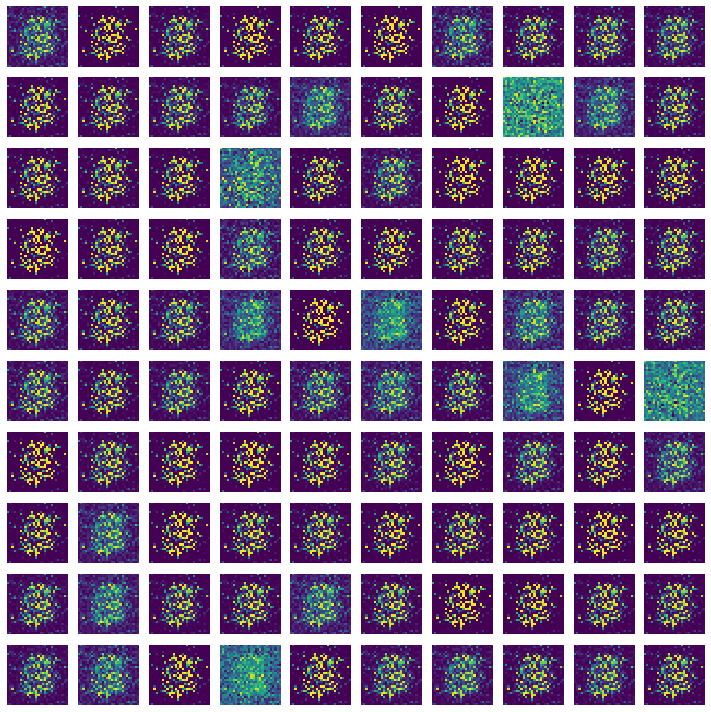

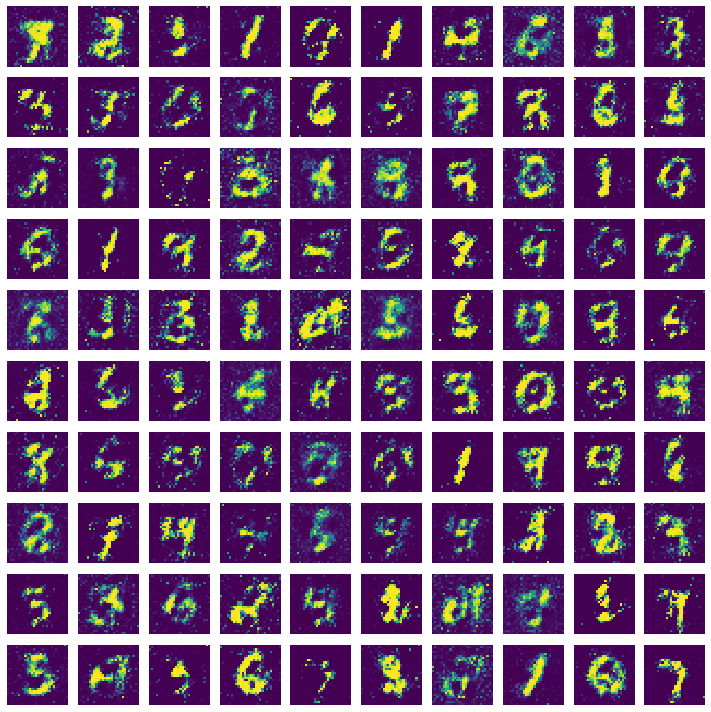

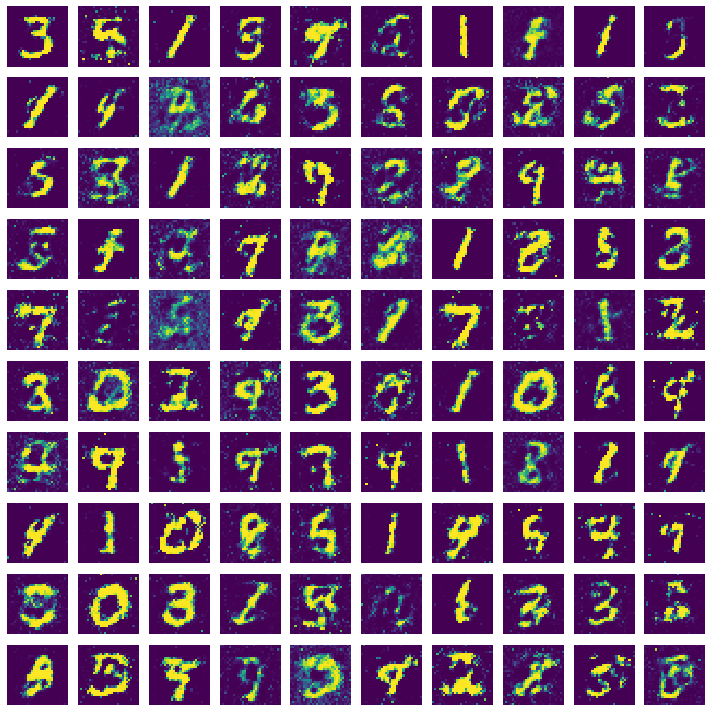

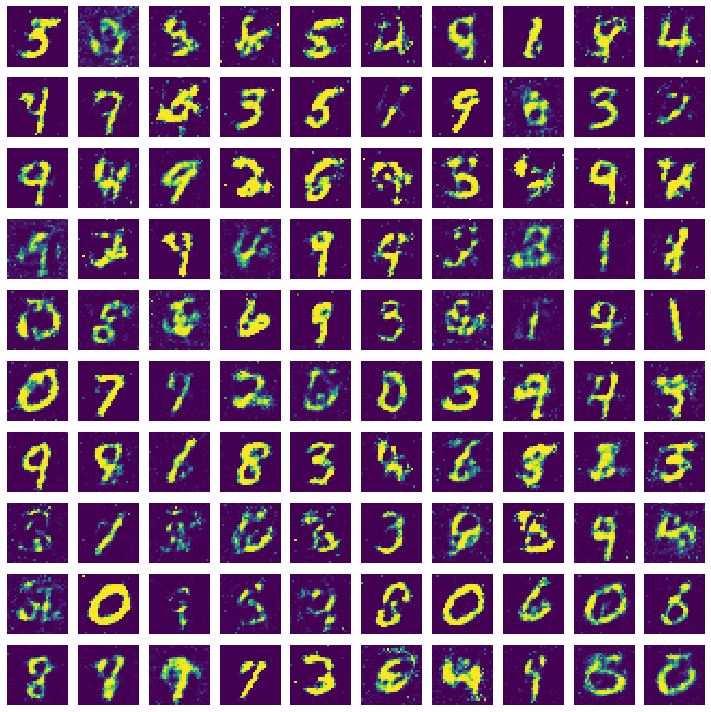

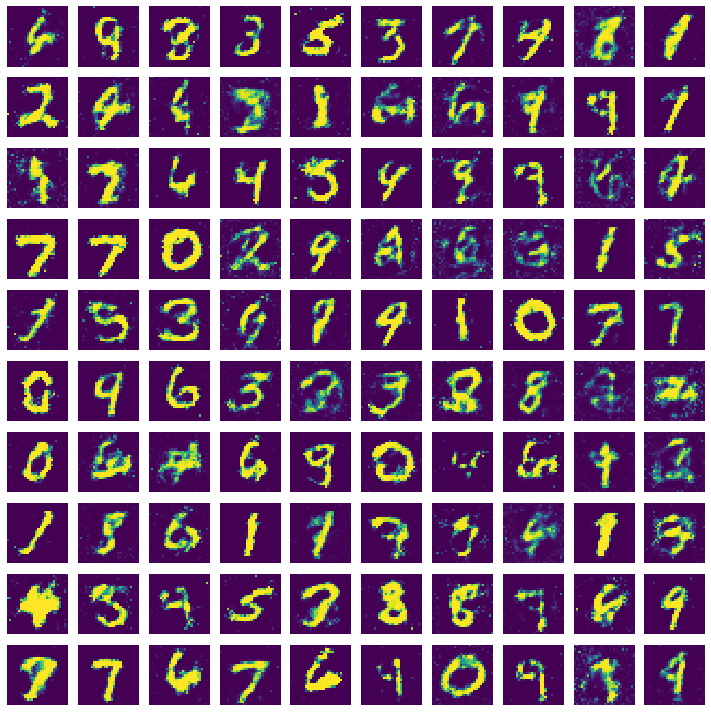

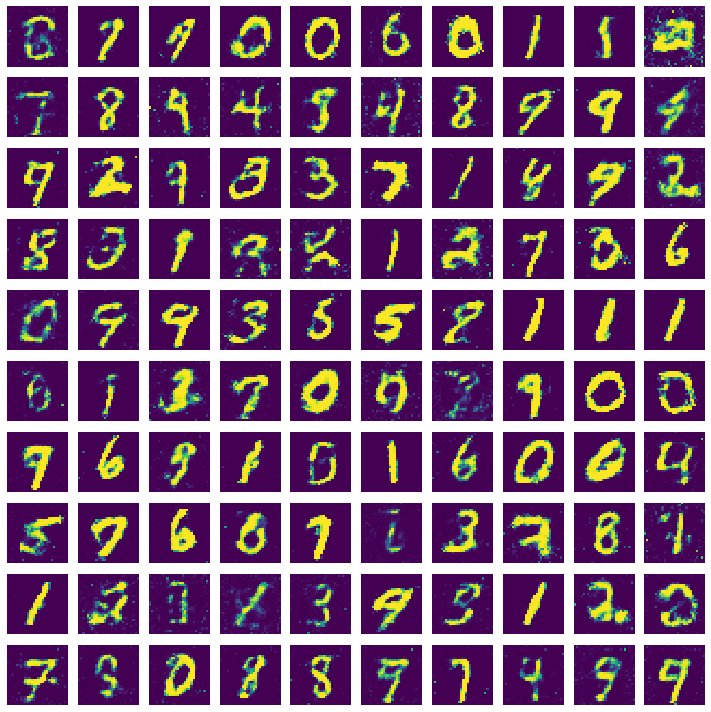

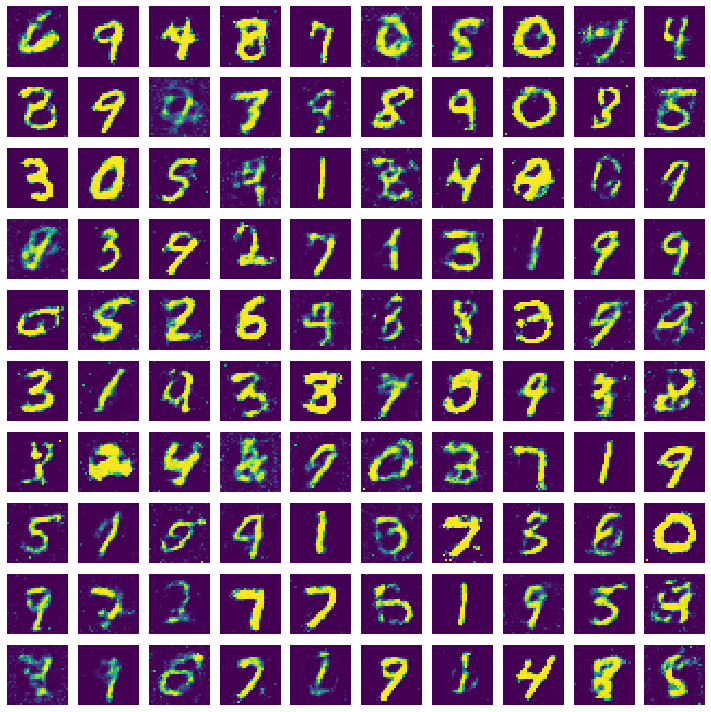

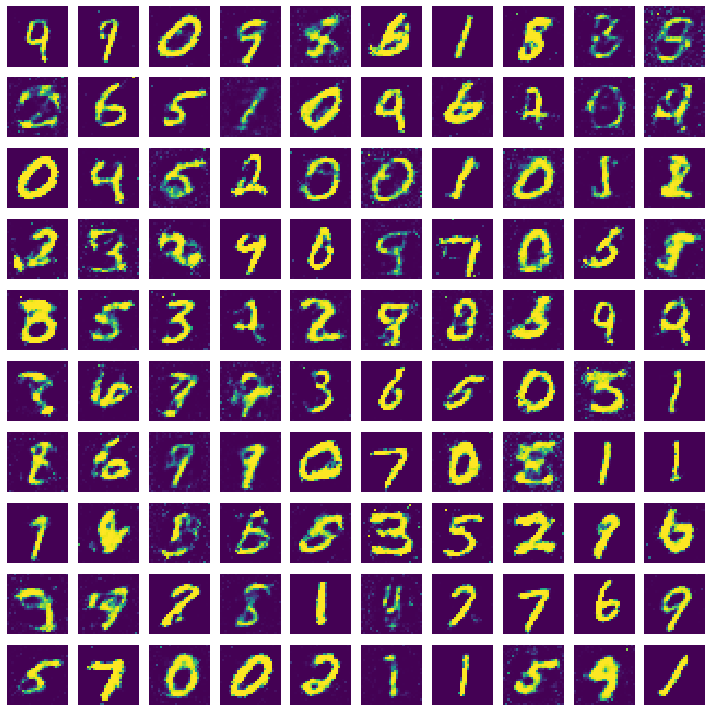

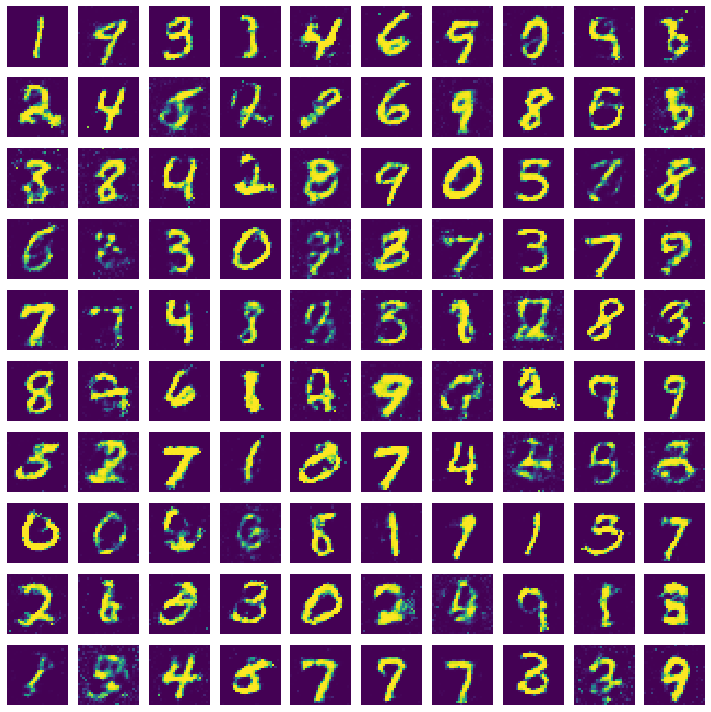

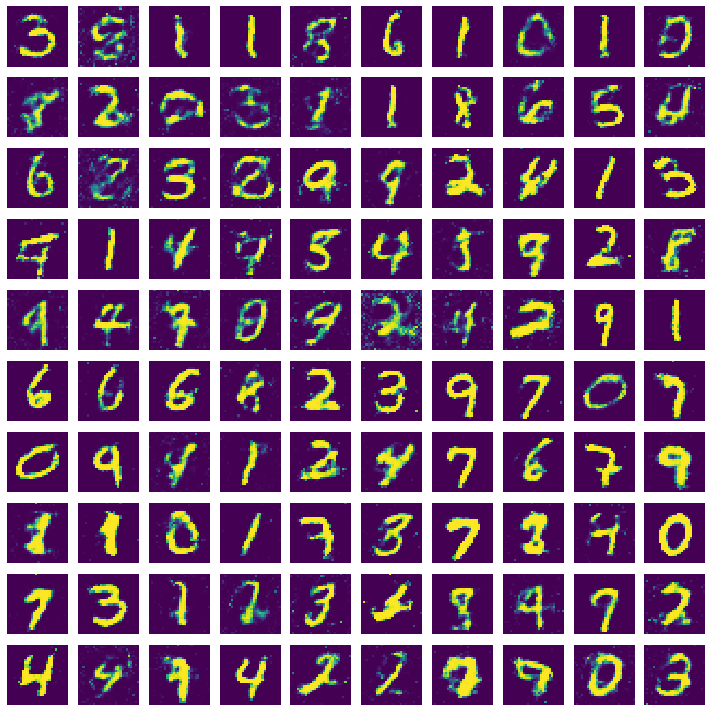

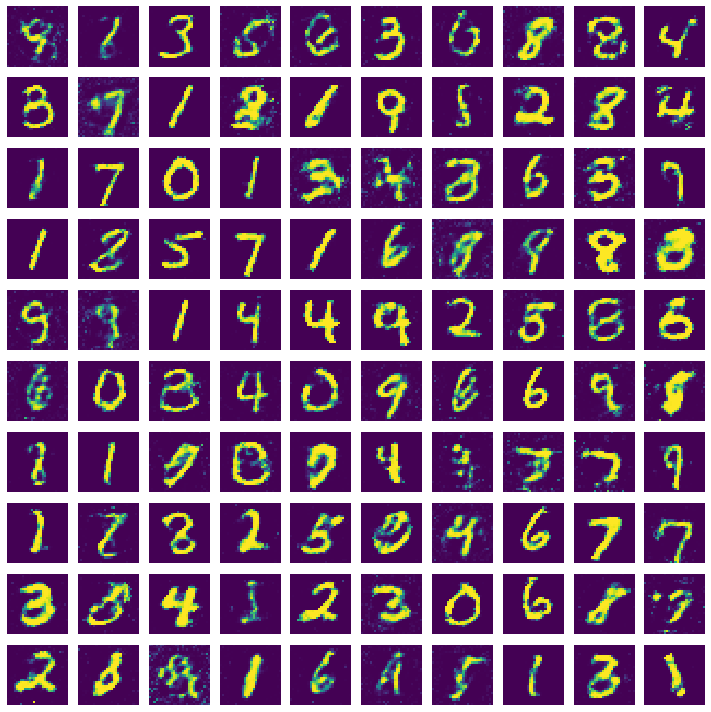

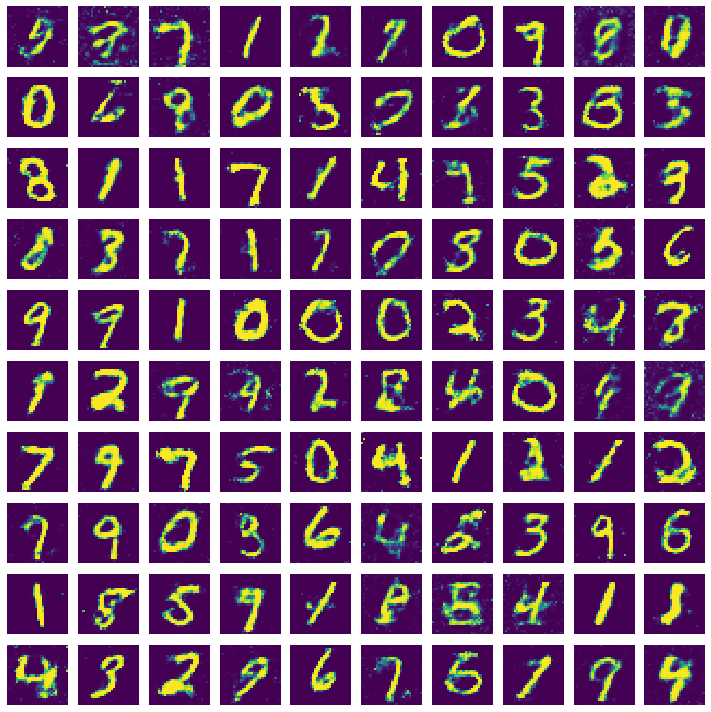

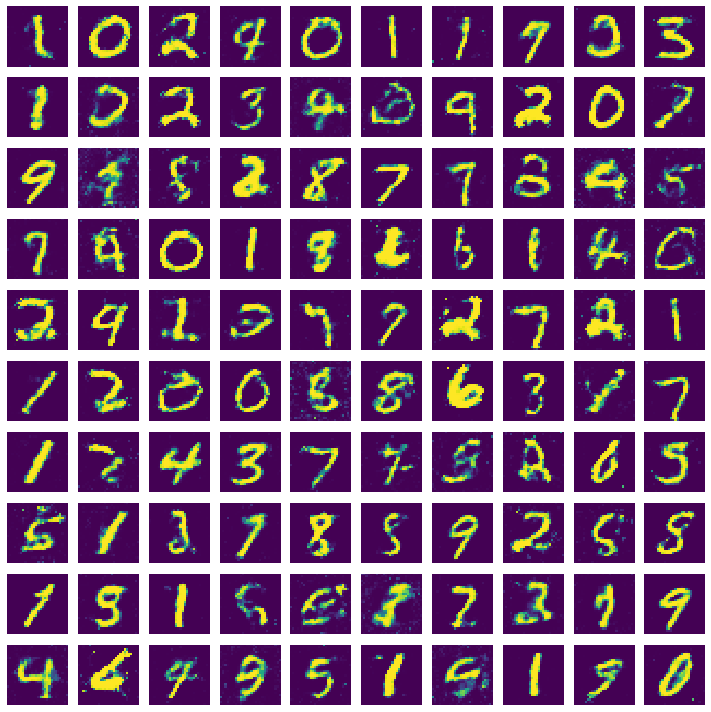

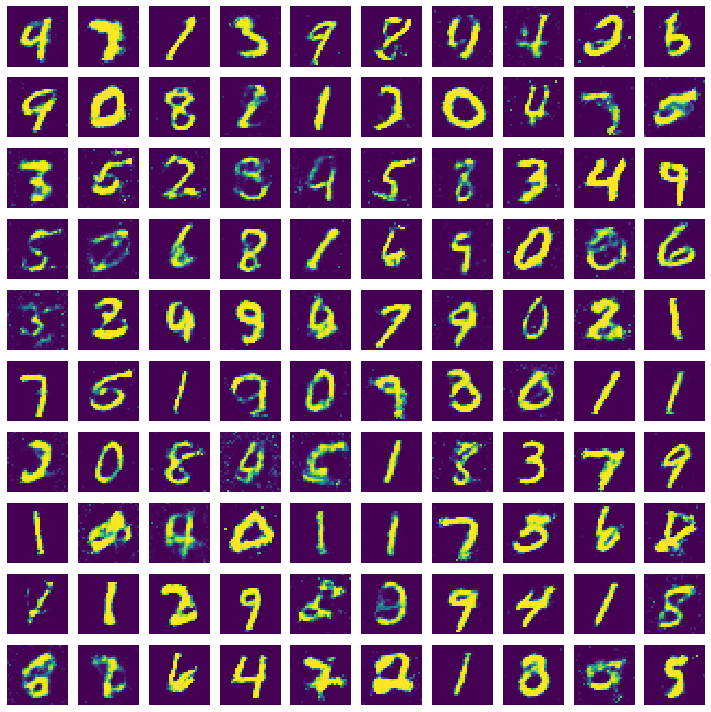

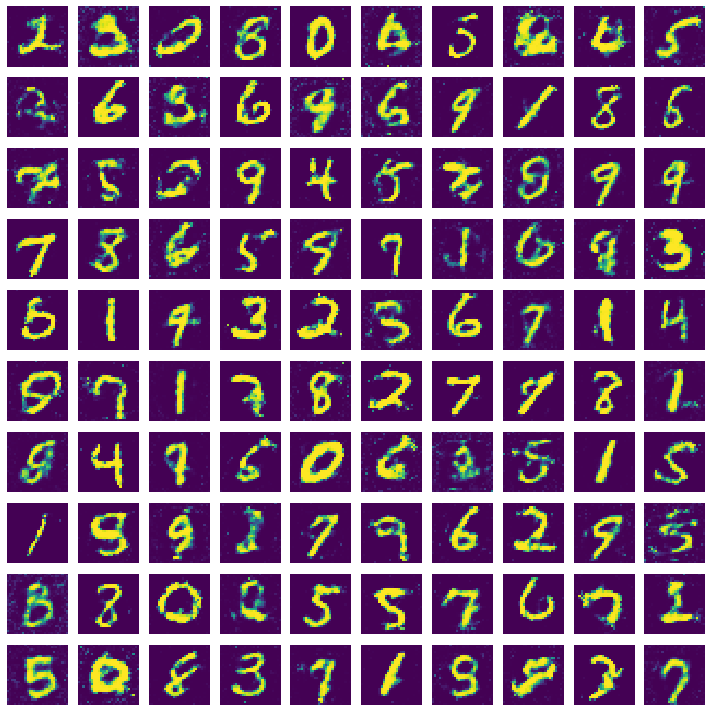

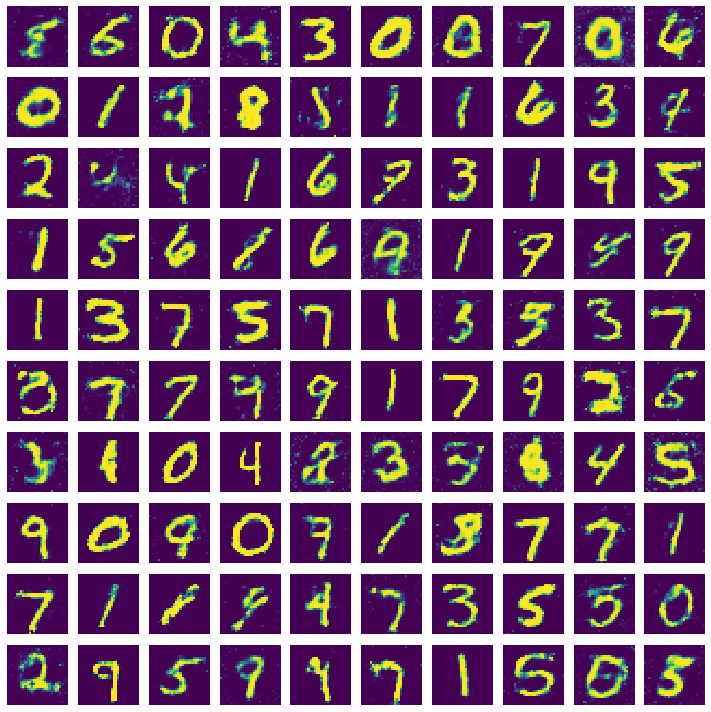

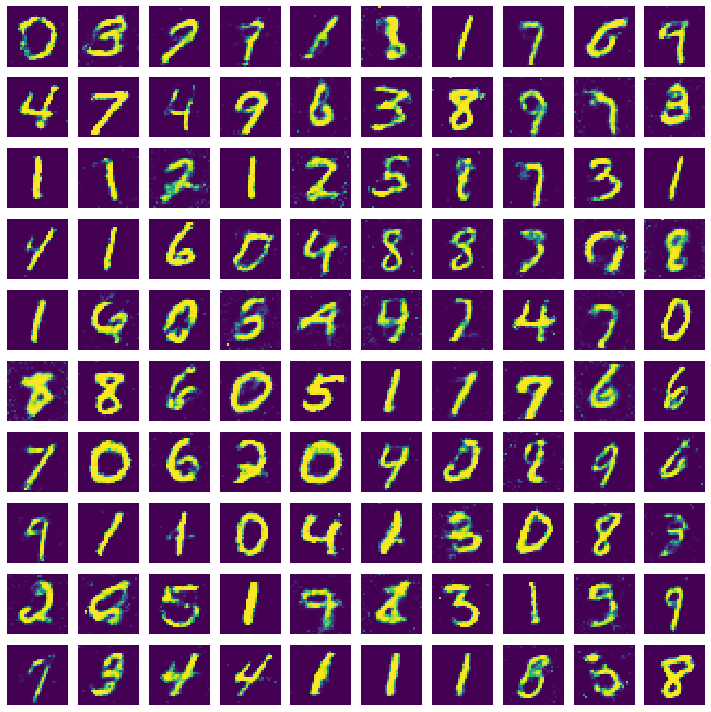

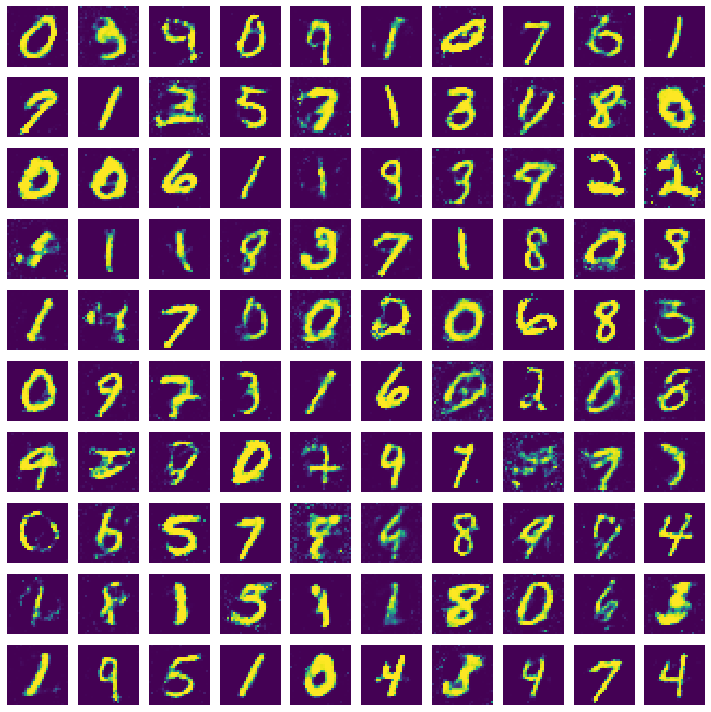

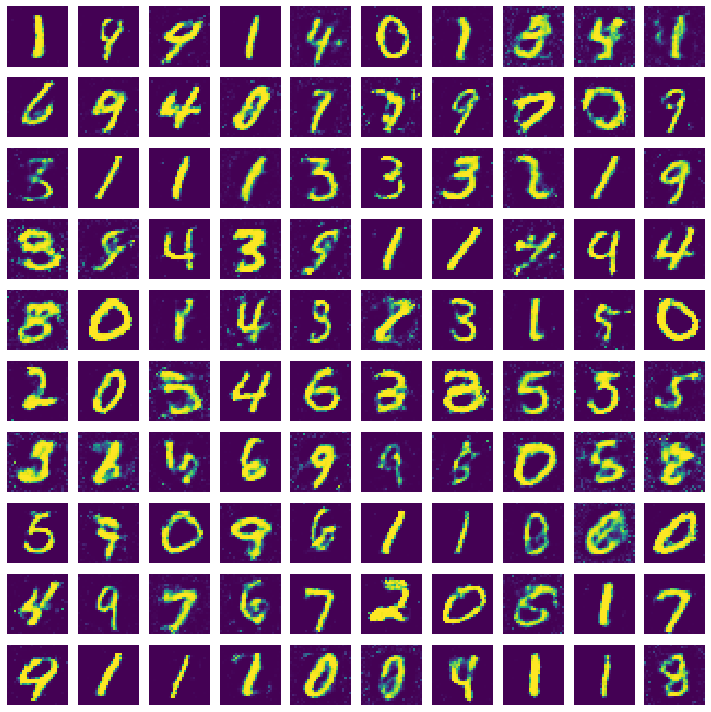

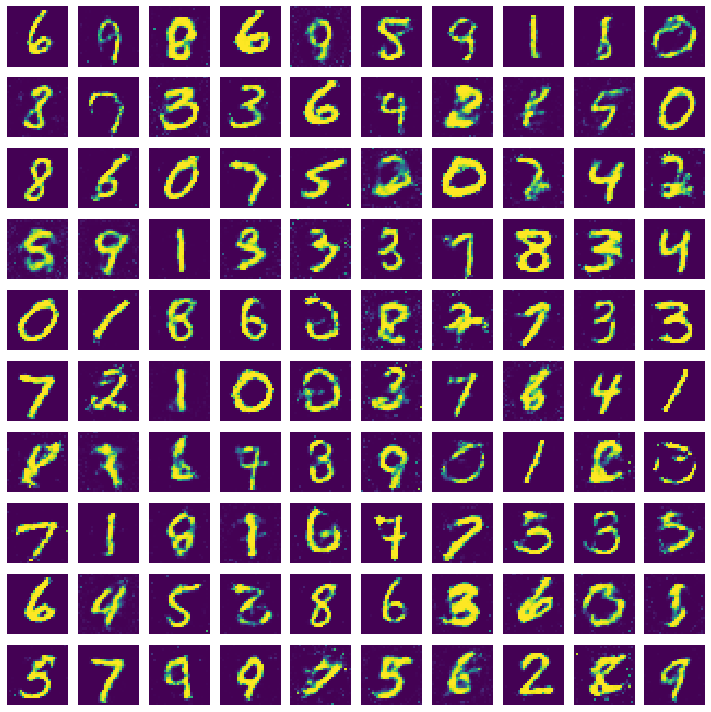

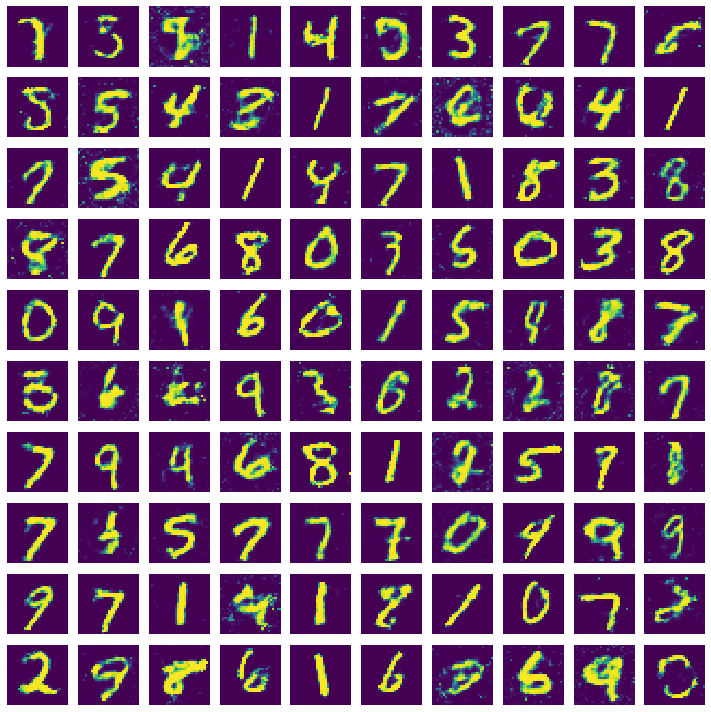

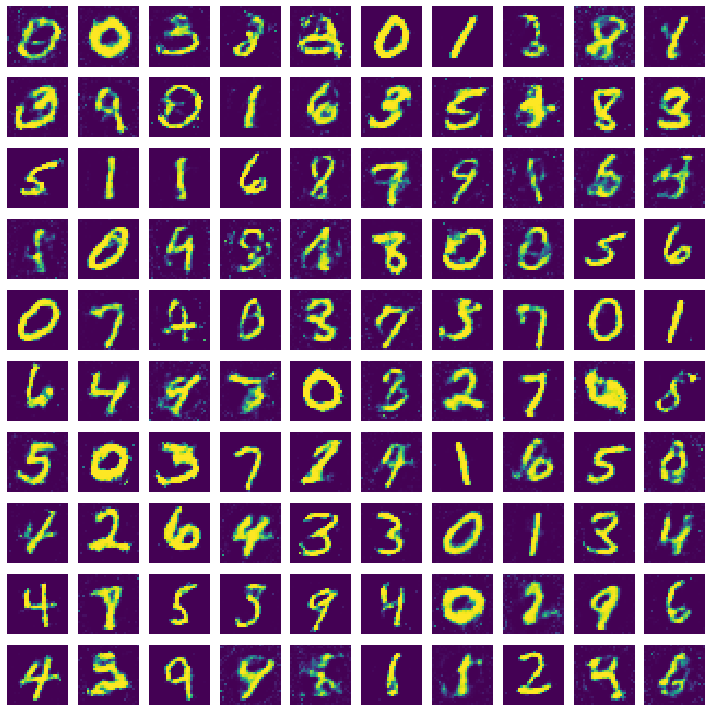

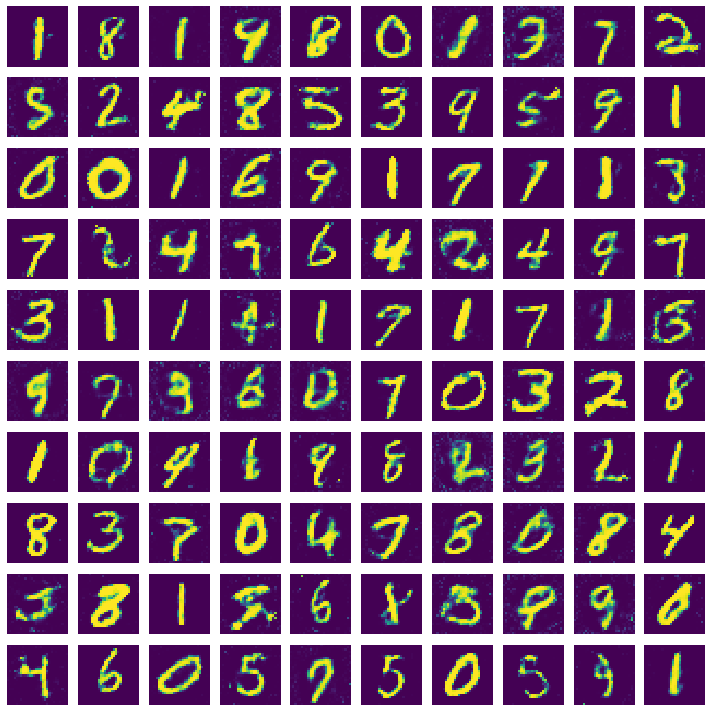

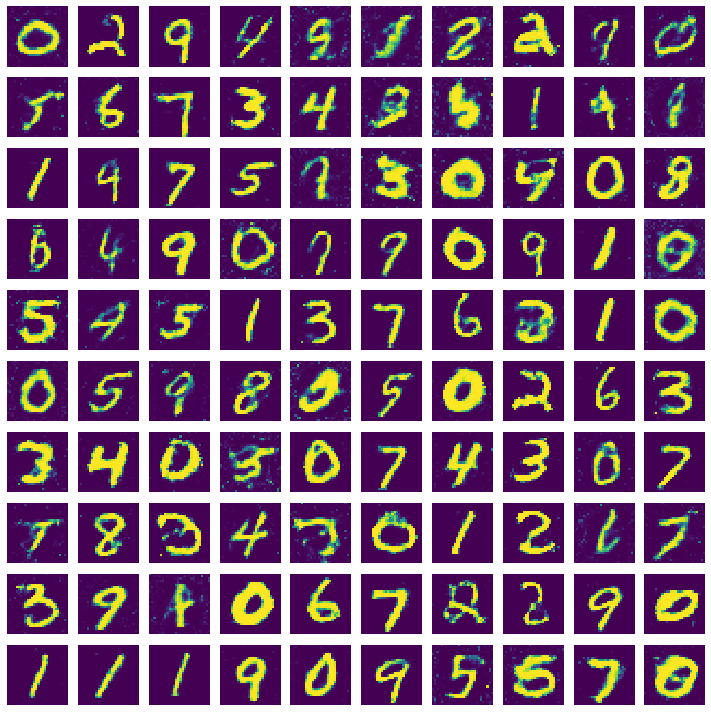

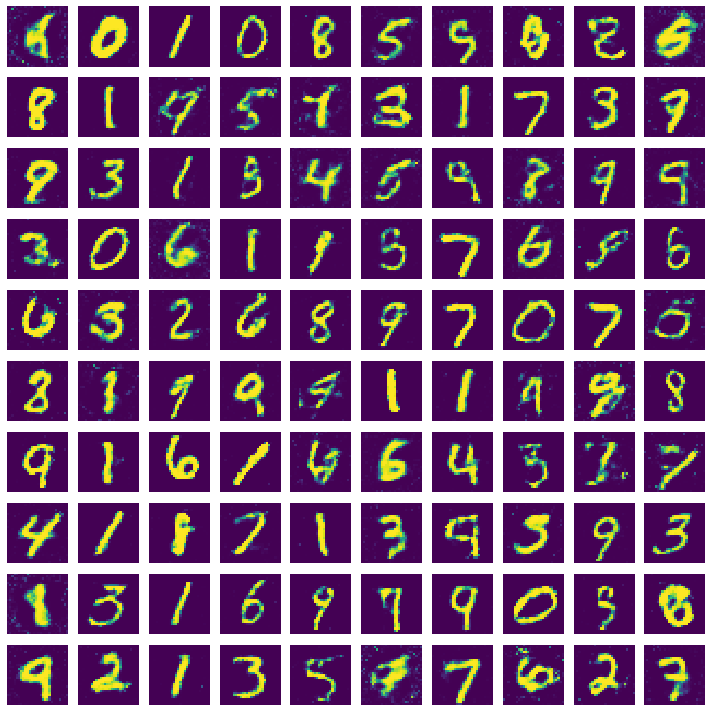

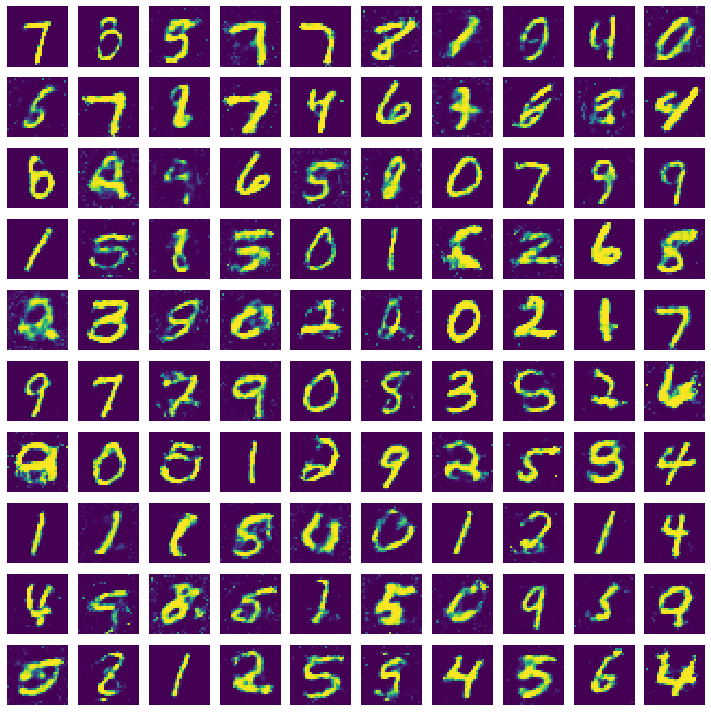

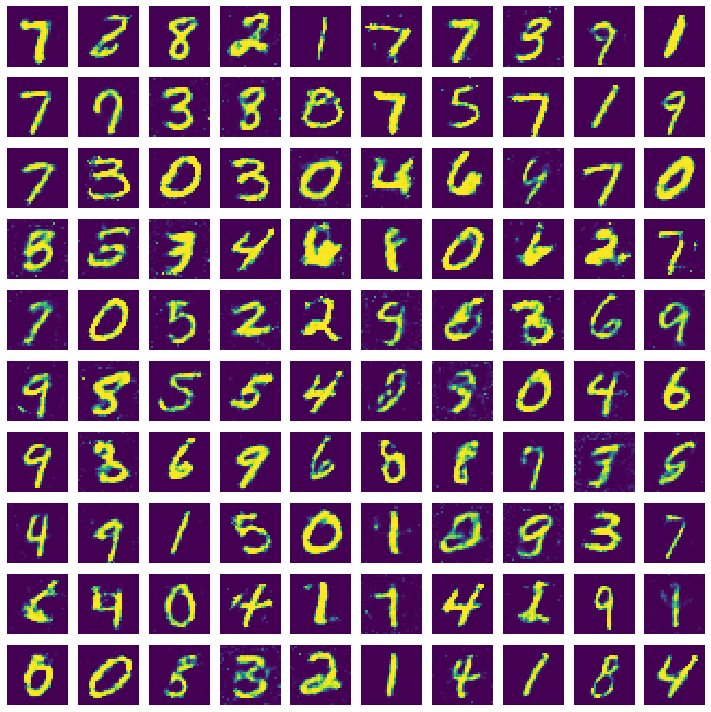

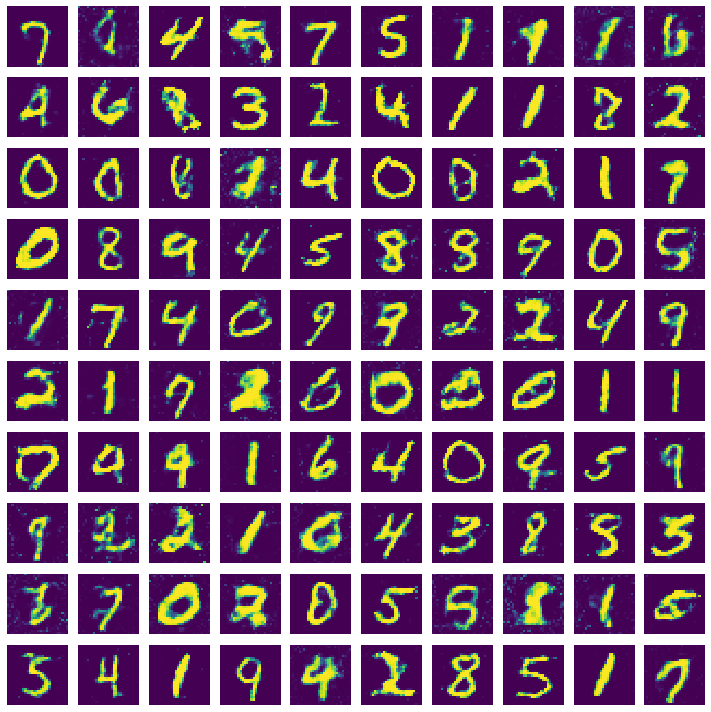

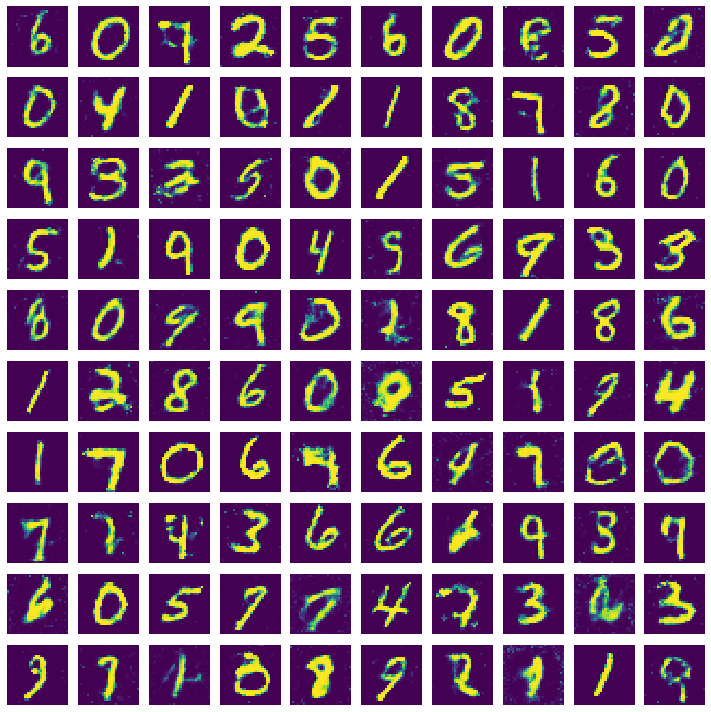

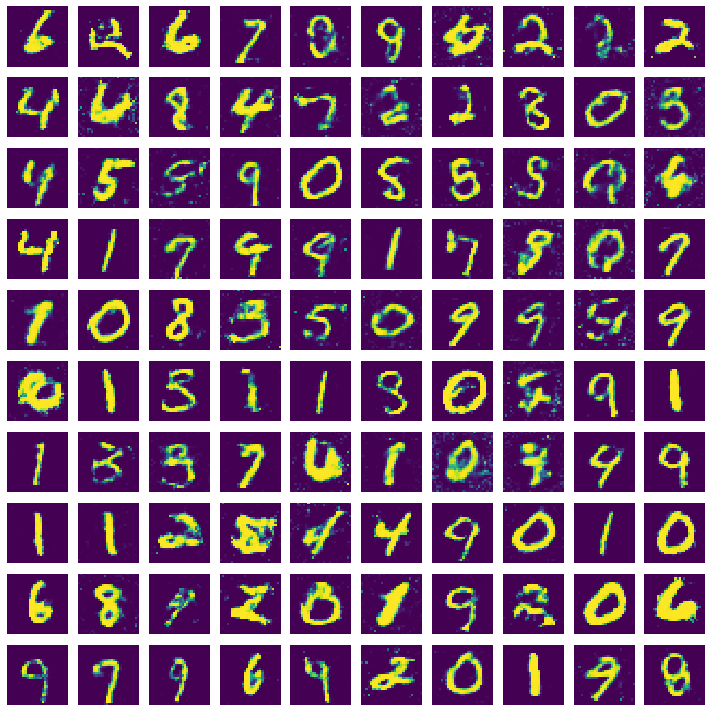

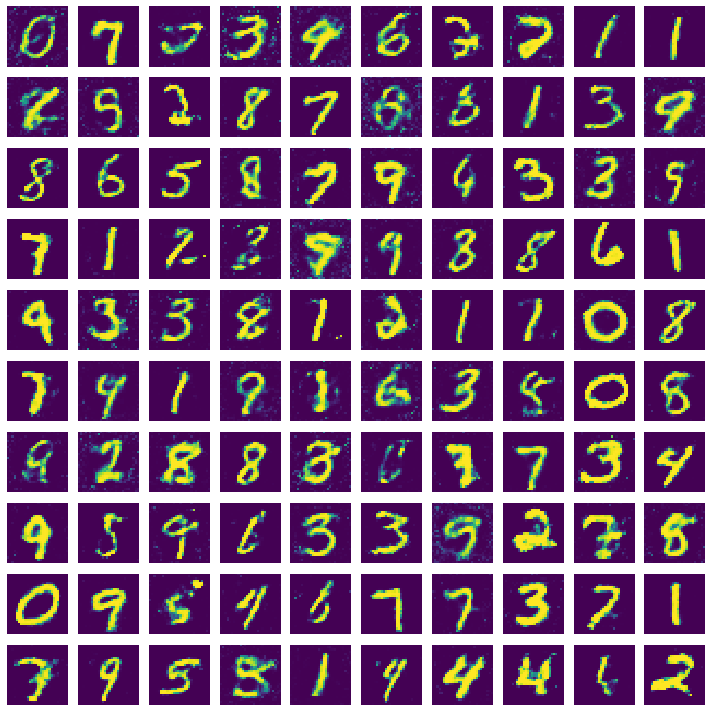

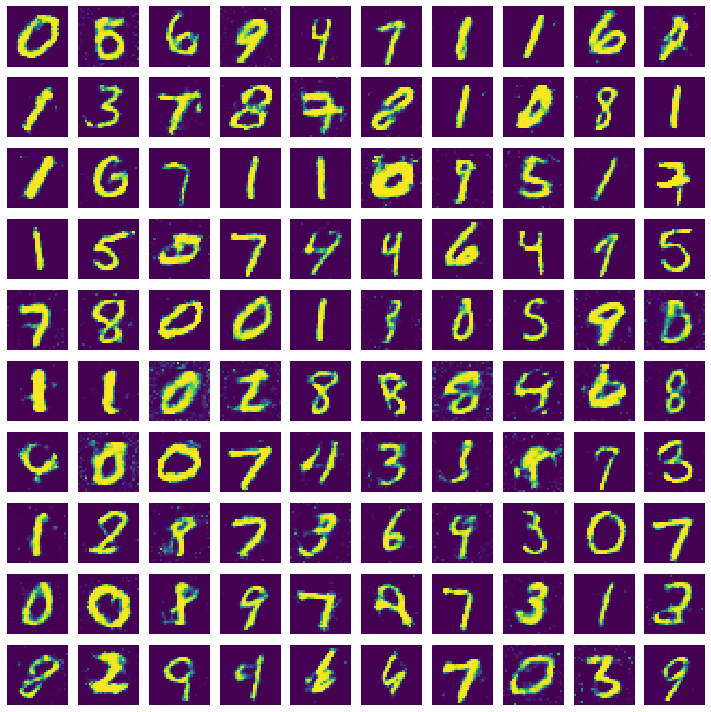

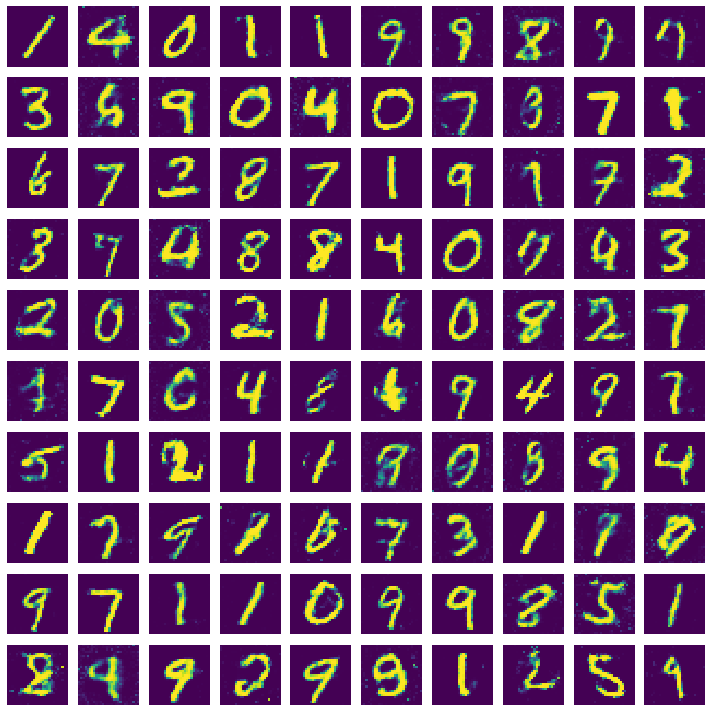

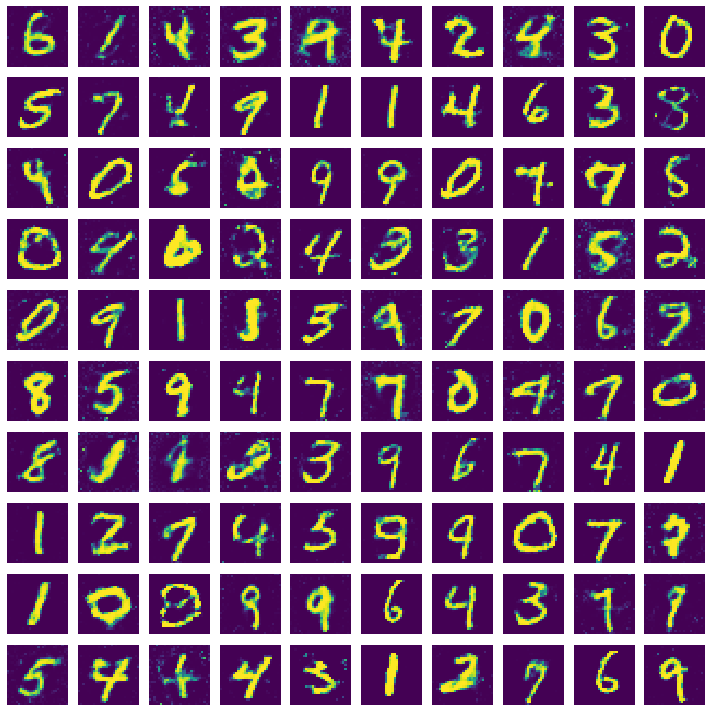

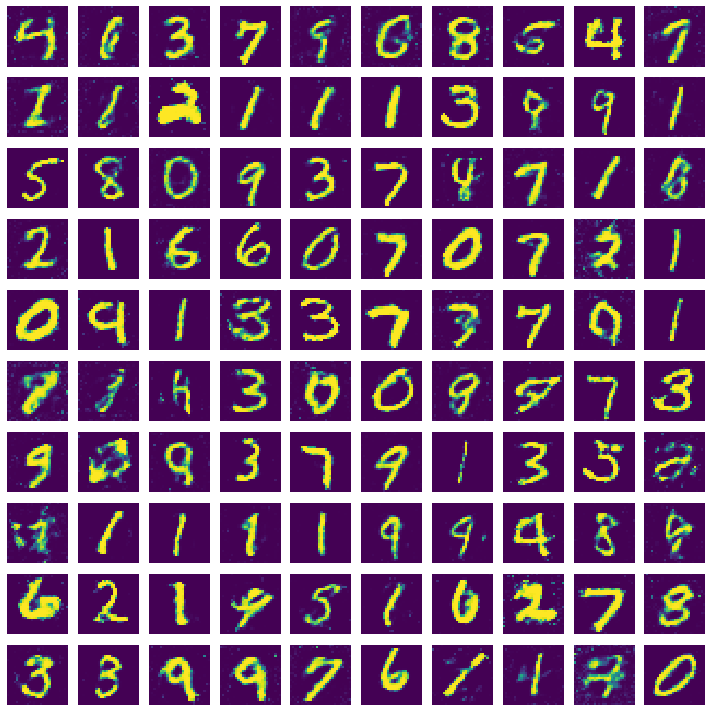

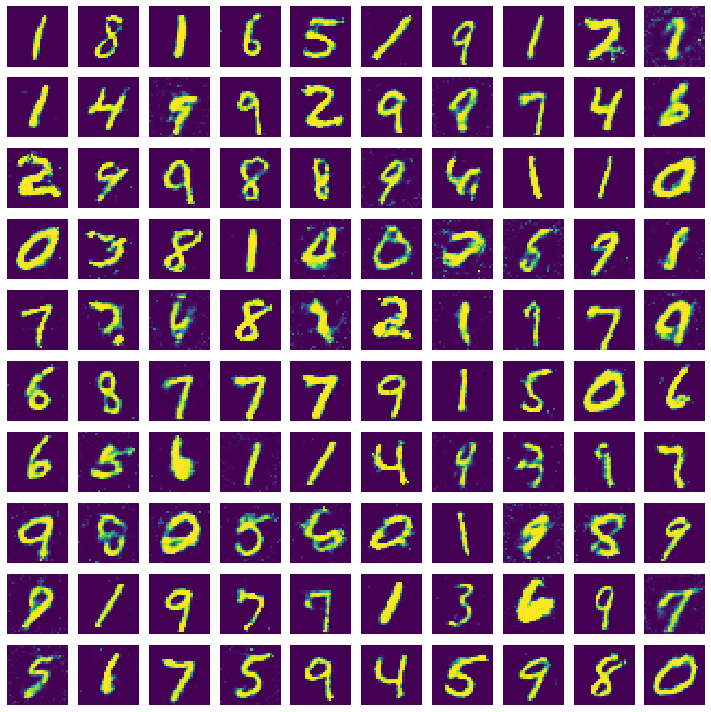

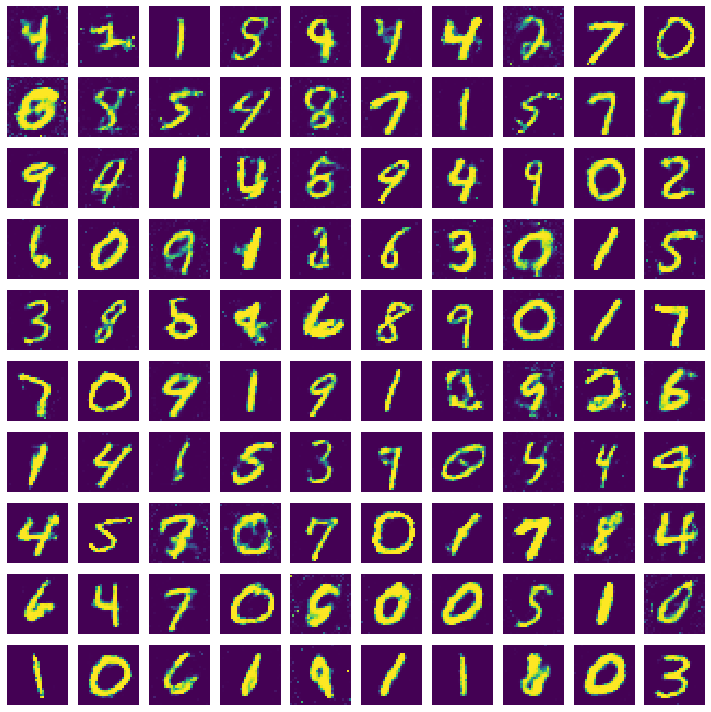

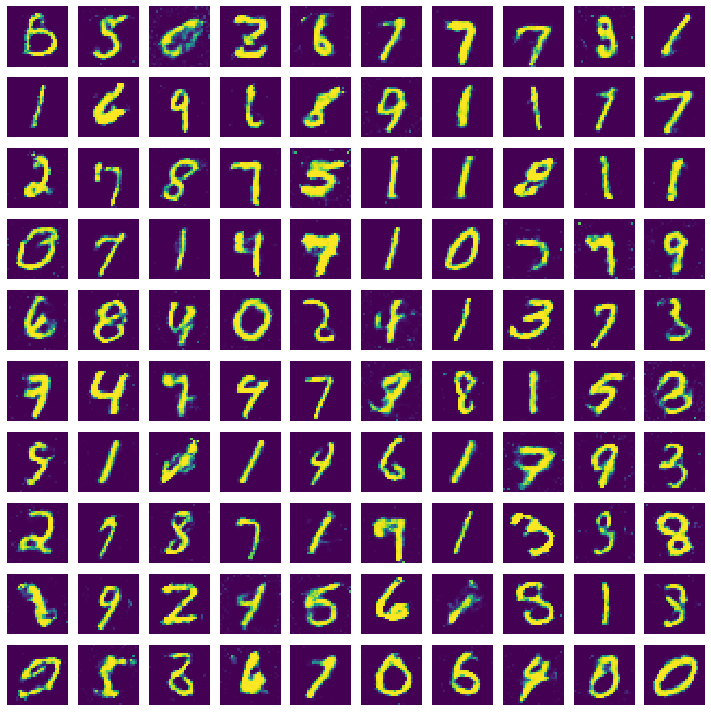

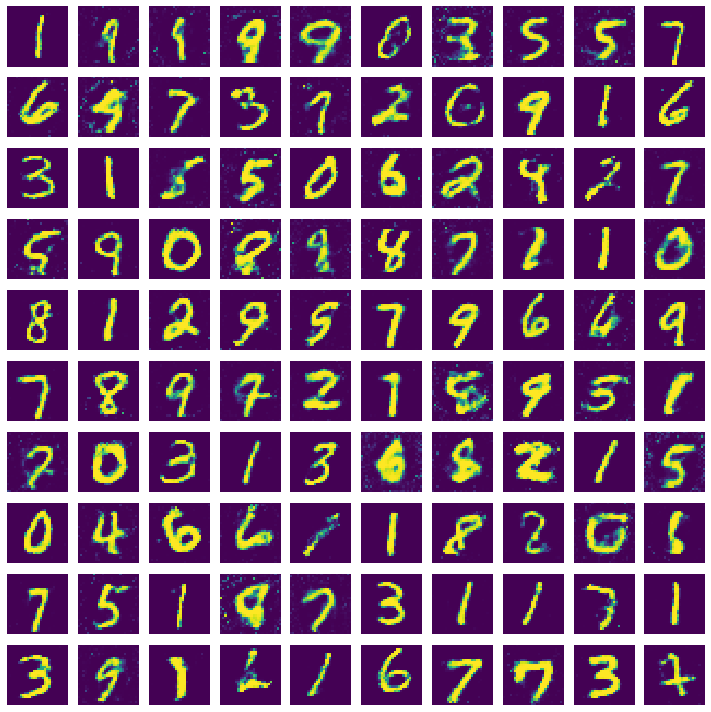

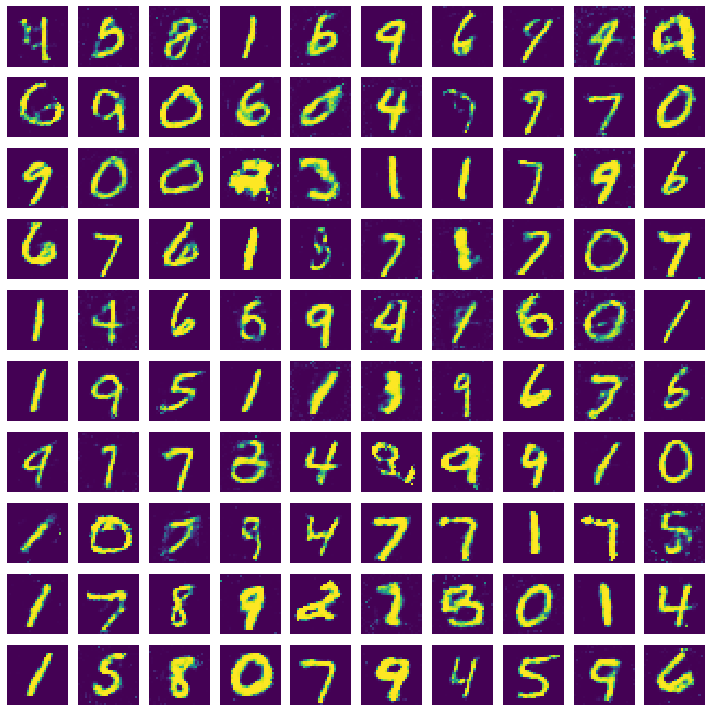

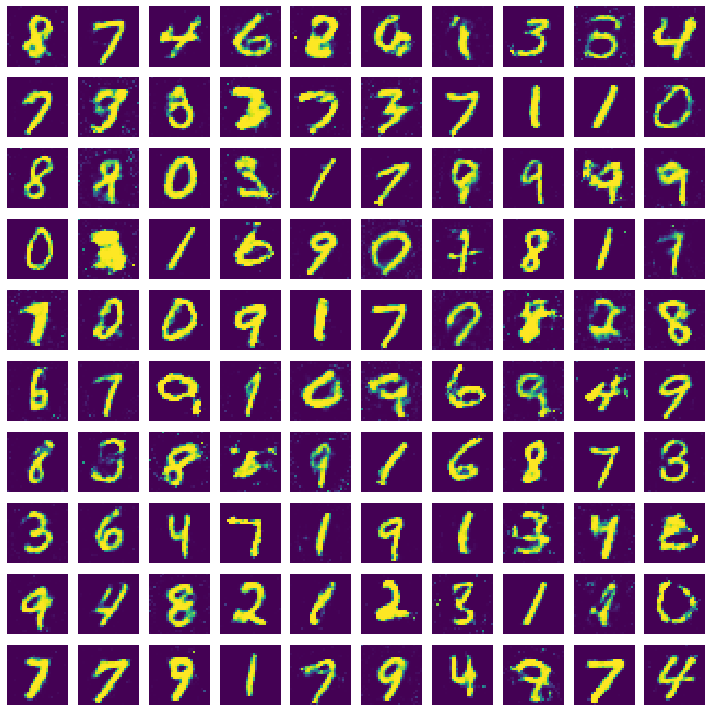

In [11]:
def training(epochs=1, batch_size=128):
    
    #Loading the data
    (X_train, y_train, X_test, y_test) = load_data()
    batch_count = X_train.shape[0] / batch_size
    
    # Creating GAN
    generator= create_generator()
    discriminator= create_discriminator()
    gan = create_gan(discriminator, generator)
    
    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        for _ in tqdm(range(batch_size)):
        #generate  random noise as an input  to  initialize the  generator
            noise= np.random.normal(0,1, [batch_size, 100])
            
            # Generate fake MNIST images from noised input
            generated_images = generator.predict(noise)
            
            # Get a random set of  real images
            image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            
            #Construct different batches of  real and fake data 
            X= np.concatenate([image_batch, generated_images])
            
            # Labels for generated and real data
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=0.9
            
            #Pre train discriminator on  fake and real data  before starting the gan. 
            discriminator.trainable=True
            discriminator.train_on_batch(X, y_dis)
            
            #Tricking the noised input of the Generator as real data
            noise= np.random.normal(0,1, [batch_size, 100])
            y_gen = np.ones(batch_size)
            
            # During the training of gan, 
            # the weights of discriminator should be fixed. 
            #We can enforce that by setting the trainable flag
            discriminator.trainable=False
            
            #training  the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
            gan.train_on_batch(noise, y_gen)
            
        if e == 1 or e % 20 == 0:
           
            plot_generated_images(e, generator)
training(800,128)